In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.sample(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
havven,-4.07216,4.33651,-13.29164,-20.84154,-39.42657,622.92465,678.78427
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
binance-usd,-0.10642,0.04726,0.05902,0.01843,0.09383,0.09959,0.13928
stellar,-1.00843,2.07149,-1.08217,-8.12933,-30.80369,84.62157,13.80715
maker,-0.60285,8.15400,-1.48854,16.71360,-18.61722,82.53544,10.65279


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# instantiate the scaler
scaler = StandardScaler()
# scale the dataframe (all columns are numerical)
market_data_normalized = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
# convert the numpy array back to a dataframe, retaining original column names
market_data_normalized = pd.DataFrame(market_data_normalized, columns=df_market_data.columns)

# Copy the crypto names from the original data
# Set the coinid column as index

# (since index was already set for original df:)
market_data_normalized.index = df_market_data.index

# Display sample data
market_data_normalized.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_vals = range(1, 12)

In [8]:
# Create an empty list to store the inertia values
ssd = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(market_data_normalized)
    ssd.append(kmeans.inertia_)

/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

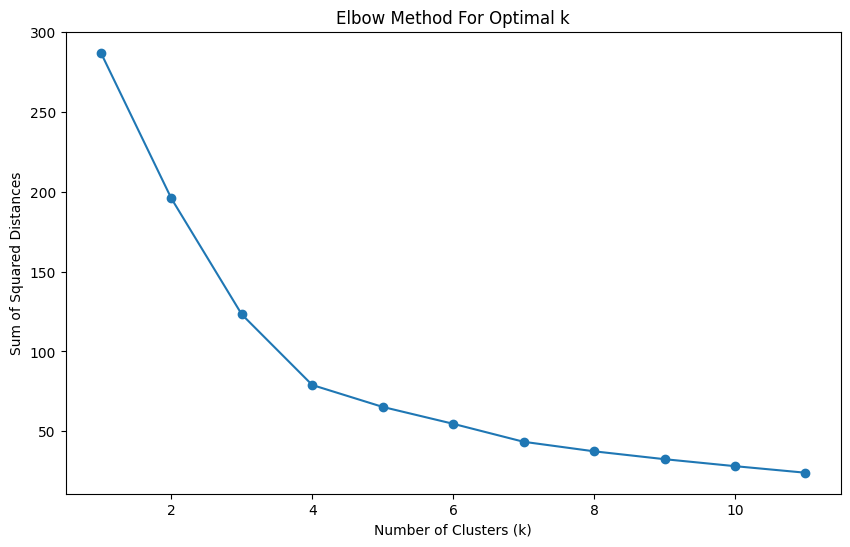

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot SSD (inertia) for each k
plt.figure(figsize=(10,6))
plt.plot(k_vals, ssd, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

### 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [10]:
# Initialize the K-Means model using the best value for k
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [11]:
# Fit the K-Means model using the scaled data
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.fit_predict(market_data_normalized)

/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
# Print the resulting array of cluster values.
clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [13]:
# Create a copy of the DataFrame
new_market_data = df_market_data.copy().reset_index()

# Add a new column to the DataFrame with the predicted clusters
new_market_data['cluster'] = clusters

# Display sample data
new_market_data.head(5)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [14]:

# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter1 = new_market_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hover_cols=['coin_id'],  
    color='cluster',
    colormap='Category10',       
    size=10,                    
    width=500,
    height=300,
    title="24h vs. 7d Price Change Normal"
)

scatter1

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [15]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [16]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

market_data_pca = pca.fit_transform(market_data_normalized)

In [17]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variances = pca.explained_variance_ratio_
print(explained_variances)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.50316570309845

In [18]:
# Create a new DataFrame with the PCA data.
md_pca_df = pd.DataFrame(market_data_pca).reset_index(drop=True)

# Copy the crypto names from the original data
# Set the coinid column as index
md_pca_df.index = df_market_data.index

# Display sample data
md_pca_df.head()

,0,1,2
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [19]:
# Create a list with the number of k-values from 1 to 11
pca_k_vals = range(1, 12)

In [20]:
# Create an empty list to store the inertia values
pca_ssd = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in pca_k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(md_pca_df)
    pca_ssd.append(kmeans.inertia_)

/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

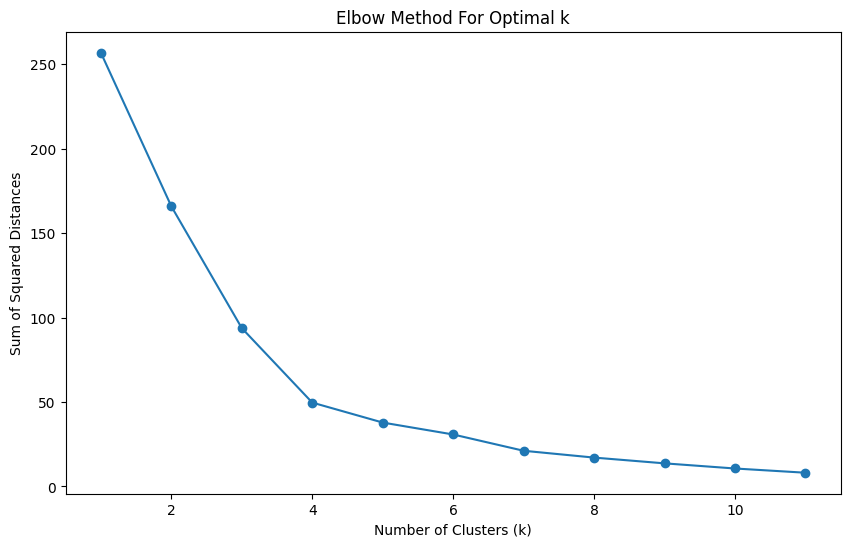

In [21]:
# Plot PCA SSD for each k
plt.figure(figsize=(10,6))
plt.plot(pca_k_vals, pca_ssd, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [22]:
# Initialize the K-Means model using the best value for k
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [23]:
# Fit and Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.fit_predict(md_pca_df)

# Print the resulting array of cluster values.
clusters

/Users/jnorth/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [24]:
# Create a copy of the DataFrame
new_md_pca = md_pca_df.copy().reset_index()

# Add a new column to the DataFrame with the predicted clusters
new_md_pca['cluster'] = clusters

# Display sample data
new_md_pca.head(5)

,coin_id,0,1,2,cluster
0,bitcoin,-0.600667,0.842760,0.461595,0
1,ethereum,-0.458261,0.458466,0.952877,0
2,tether,-0.433070,-0.168126,-0.641752,2
3,ripple,-0.471835,-0.222660,-0.479053,2
4,bitcoin-cash,-1.157800,2.041209,1.859715,0


In [25]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter2 = new_md_pca.hvplot.scatter(
    x='1',
    y='2',
    xlabel="price_change_percentage_24h", 
    ylabel="price_change_percentage_7d",
    hover_cols=['coin_id'],  
    color='cluster',
    colormap='Category10',       
    size=10,                    
    width=500,
    height=300,
    title="24h vs. 7d Price Change PCA"
)

scatter2

:Scatter   [1]   (2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

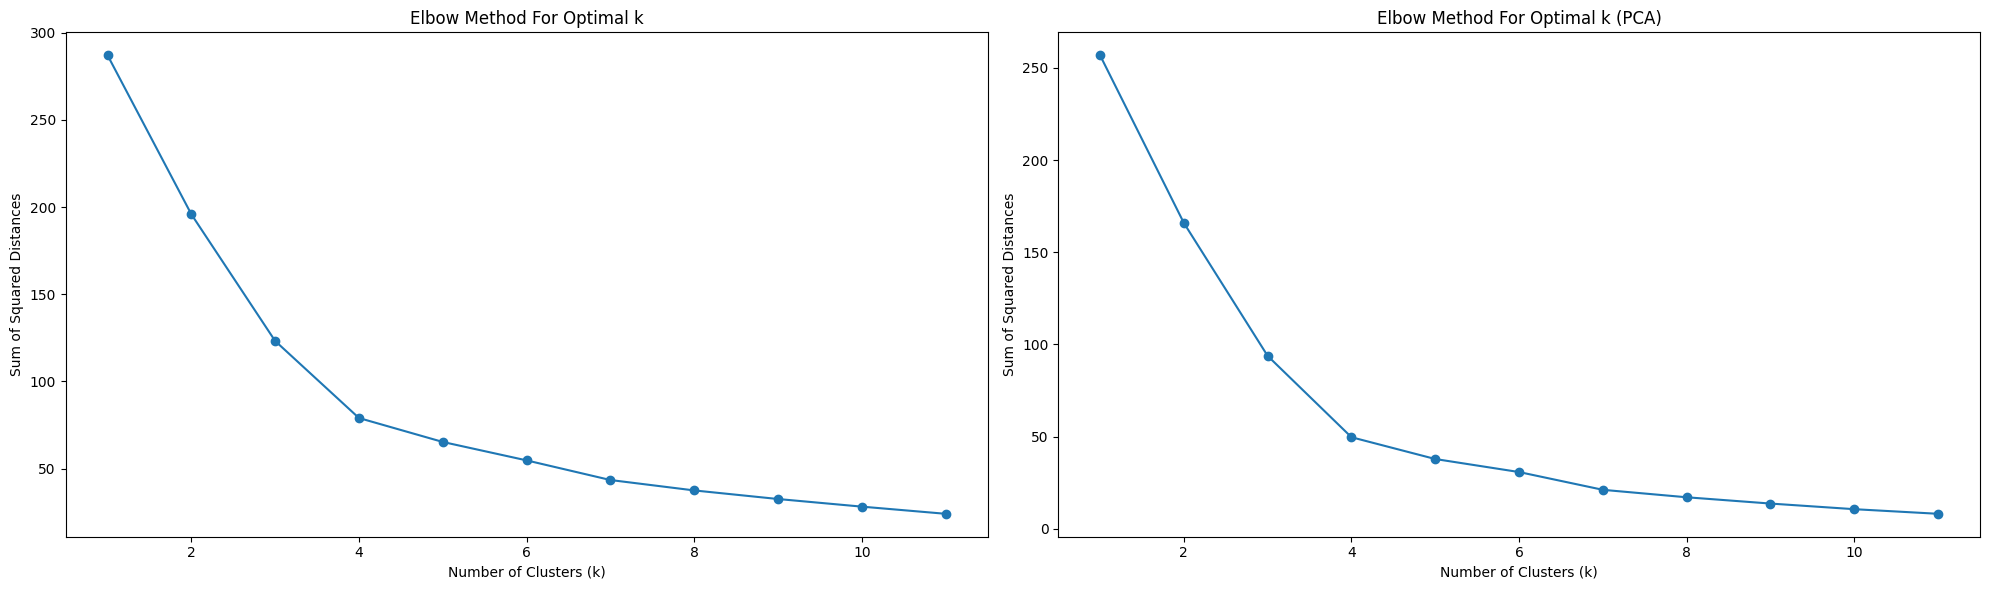

In [26]:
# Composite plot to contrast the Elbow curves
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Plot the first plot on the first subplot
axes[0].plot(k_vals, ssd, '-o')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Sum of Squared Distances')
axes[0].set_title('Elbow Method For Optimal k')

# Plot the second plot on the second subplot
axes[1].plot(pca_k_vals, pca_ssd, '-o')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Sum of Squared Distances')
axes[1].set_title('Elbow Method For Optimal k (PCA)')

# Display the combined figure
plt.tight_layout()  # This ensures that the plots are spaced nicely
plt.show()


In [27]:
# Composite plot to contrast the clusters
combined_plot = scatter1 + scatter2
combined_plot


/Users/jnorth/Library/Python/3.9/lib/python/site-packages/holoviews/plotting/bokeh/plot.py:967: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/Users/jnorth/Library/Python/3.9/lib/python/site-packages/holoviews/plotting/bokeh/plot.py:967: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)
   .Scatter.II :Scatter   [1]   (2,cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** User
all I can really say about the plots are that the PCA scatter is concentrated in a narrower range, and yet the variance in the data has been preserved - perhaps even highlighted due to less overlapping of clusters.  

